In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os, sys, cv2
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
#HOG ratio 1:2
img_height = 128
img_width = 64

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'worosa'
os.environ['KAGGLE_KEY'] = 'feed01f37299bea03c690bc5e3621bfb'

!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset
!unzip -u -qq microsoft-catsvsdogs-dataset

#corrupted or useless files
!rm 'MSR-LA - 3467.docx'
!rm 'readme[1].txt'
#!rm 'PetImages/Cat/7968.jpg'
!rm 'PetImages/Cat/666.jpg'
#!rm 'PetImages/Dog/7112.jpg'
!rm 'PetImages/Dog/11702.jpg'
#!rm 'PetImages/Cat/untitled'
!rm 'PetImages/Dog/Thumbs.db'
!rm 'PetImages/Cat/Thumbs.db'

 99% 778M/788M [00:03<00:00, 240MB/s]
100% 788M/788M [00:03<00:00, 227MB/s]


In [ ]:
from PIL import Image

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item).convert('RGB')
            f, e = os.path.splitext(path+item)
            imResize = im.resize((img_width, img_height), Image.ANTIALIAS)
            imResize.save(f + '.jpg', 'JPEG', quality=100)
            print(path+item)

path = "PetImages/Cat/"
dirs = os.listdir( path )

resize()

path = "PetImages/Dog/"
dirs = os.listdir( path )

resize()

Output streaming troncato alle ultime 5000 righe.
PetImages/Dog/10803.jpg
PetImages/Dog/11860.jpg
PetImages/Dog/10385.jpg
PetImages/Dog/10995.jpg
PetImages/Dog/7861.jpg
PetImages/Dog/6531.jpg
PetImages/Dog/1832.jpg
PetImages/Dog/12131.jpg
PetImages/Dog/11570.jpg
PetImages/Dog/8023.jpg
PetImages/Dog/8593.jpg
PetImages/Dog/2408.jpg
PetImages/Dog/11037.jpg
PetImages/Dog/9217.jpg
PetImages/Dog/10580.jpg
PetImages/Dog/9441.jpg
PetImages/Dog/8844.jpg
PetImages/Dog/9501.jpg
PetImages/Dog/11461.jpg
PetImages/Dog/3267.jpg
PetImages/Dog/7652.jpg
PetImages/Dog/3789.jpg
PetImages/Dog/11492.jpg
PetImages/Dog/6568.jpg
PetImages/Dog/1397.jpg
PetImages/Dog/5087.jpg
PetImages/Dog/5922.jpg
PetImages/Dog/8558.jpg
PetImages/Dog/4285.jpg
PetImages/Dog/4280.jpg
PetImages/Dog/12304.jpg
PetImages/Dog/5777.jpg
PetImages/Dog/12175.jpg
PetImages/Dog/434.jpg
PetImages/Dog/11560.jpg
PetImages/Dog/2265.jpg
PetImages/Dog/9978.jpg
PetImages/Dog/11184.jpg
PetImages/Dog/6832.jpg
PetImages/Dog/2073.jpg
PetImages/Dog/365

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

Output streaming troncato alle ultime 5000 righe.
PetImages/Dog/3622.jpg
PetImages/Dog/5014.jpg
PetImages/Dog/12329.jpg
PetImages/Dog/4995.jpg
PetImages/Dog/3412.jpg
PetImages/Dog/2424.jpg
PetImages/Dog/7163.jpg
PetImages/Dog/2462.jpg
PetImages/Dog/4642.jpg
PetImages/Dog/10992.jpg
PetImages/Dog/11023.jpg
PetImages/Dog/5527.jpg
PetImages/Dog/116.jpg
PetImages/Dog/11385.jpg
PetImages/Dog/5647.jpg
PetImages/Dog/9336.jpg
PetImages/Dog/5034.jpg
PetImages/Dog/91.jpg
PetImages/Dog/5421.jpg
PetImages/Dog/11120.jpg
PetImages/Dog/3369.jpg
PetImages/Dog/12238.jpg
PetImages/Dog/5416.jpg
PetImages/Dog/974.jpg
PetImages/Dog/7977.jpg
PetImages/Dog/11432.jpg
PetImages/Dog/5998.jpg
PetImages/Dog/9163.jpg
PetImages/Dog/962.jpg
PetImages/Dog/5412.jpg
PetImages/Dog/10622.jpg
PetImages/Dog/2020.jpg
PetImages/Dog/7552.jpg
PetImages/Dog/2077.jpg
PetImages/Dog/8309.jpg
PetImages/Dog/2584.jpg
PetImages/Dog/3947.jpg
PetImages/Dog/7623.jpg
PetImages/Dog/4345.jpg
PetImages/Dog/6240.jpg
PetImages/Dog/2138.jpg
PetI

Useful links for better understanding the settings for HOGDescriptor

https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/

https://learnopencv.com/histogram-of-oriented-gradients/

In [ ]:
winSize = (64,128)          #Detection window size. Align to block size and block stride
blockSize = (16,16)         #Block size in pixels. Align to cell size.
blockStride = (8,8)         #Block stride. It must be a multiple of cell size.
cellSize = (8,8)            #Size of a cell
nbins = 9                   #Number of bins in the calculation of histogram of gradients
derivAperture = 1           #Derivative of aperture.
winSigma = sum(blockSize)/8 #Gaussian smoothing window parameter
histogramNormType = 0       #Histogram normalization method
L2HysThreshold = 0.2        #L2-Hys normalization method shrinkage
gammaCorrection = True      #Flag to specify whether the gamma correction preprocessing is required or not.
nlevels = 128               #Maximum number of detection window increases.
hog2 = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)

winStride = (8,8) #a 2-tuple that dictates the “step size” in both the x and y location of the sliding window


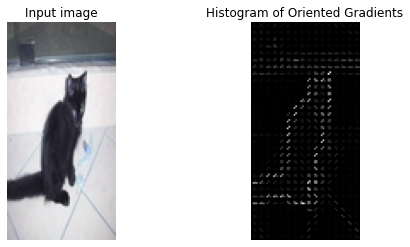

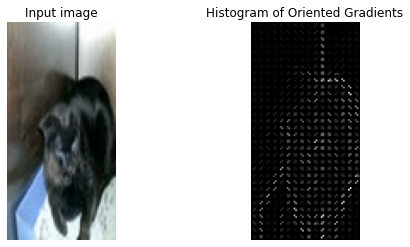

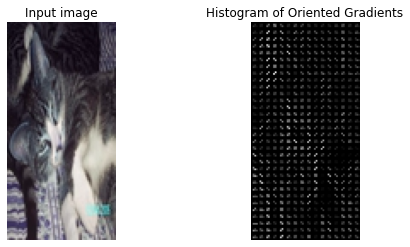

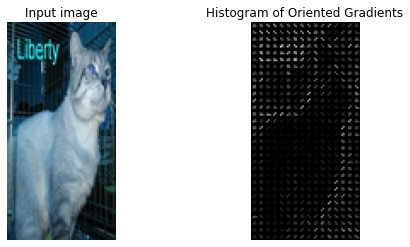

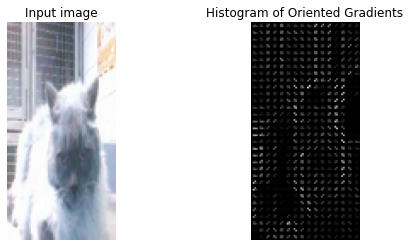

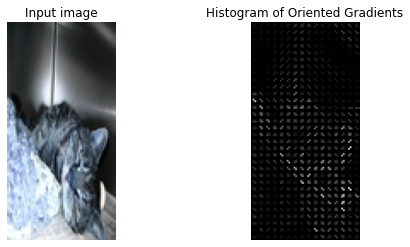

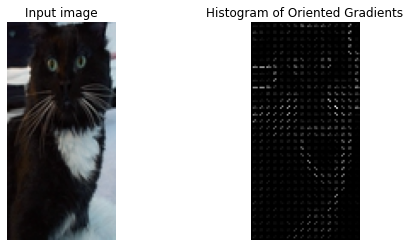

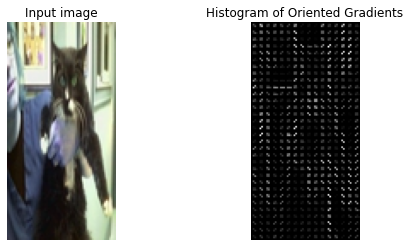

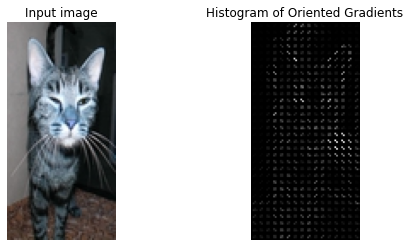

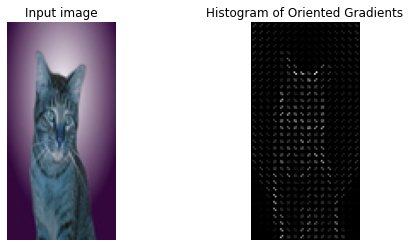

In [ ]:
from skimage import exposure, feature
import matplotlib.pyplot as plt

images = []
labels = []
#image_name = []

all_images_cat = os.listdir(f"PetImages/Cat/")
plot = len(images)
# iterate over the image names, get the label
for image in all_images_cat:
    image_path = f"PetImages/Cat/{image}"
    #image_name.append(image_path)
    image = cv2.imread(image_path)

    if(len(images) < plot+10):
      # get the HOG descriptor for the image
      #hog_desc = hog.compute(image,winStride,padding,locations)
      _, hog_image = feature.hog(image, orientations=9, 
                                        pixels_per_cell=(8, 8), #Size (in pixels) of a cell.
                                        cells_per_block=(2, 2), #Number of cells in each block
                                        transform_sqrt=True, 
                                        block_norm='L2-Hys', #Normalization using L2-norm, followed by limiting the maximum values to 0.2
                                        visualize = True)
      fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

      ax1.axis('off')
      ax1.imshow(image, cmap=plt.cm.gray)
      ax1.set_title('Input image')

      # Rescale histogram for better display
      hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

      ax2.axis('off')
      ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
      ax2.set_title('Histogram of Oriented Gradients')
      plt.show()
    hog_desc = hog2.compute(image,winStride)

    # update the data and labels
    #print(hog_desc)
    images.append(hog_desc)
    labels.append("Cat")

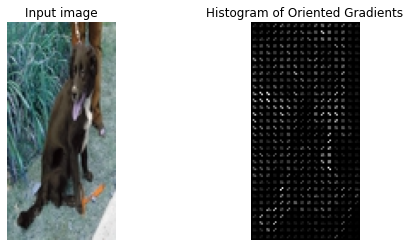

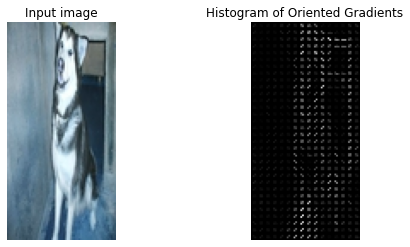

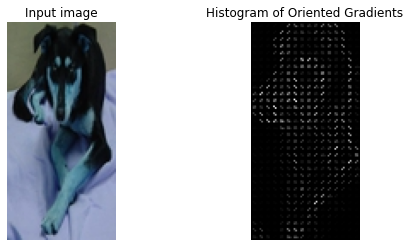

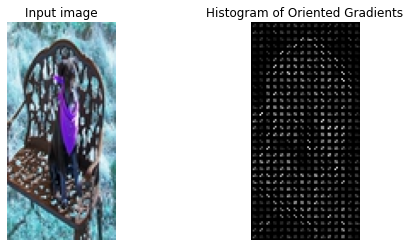

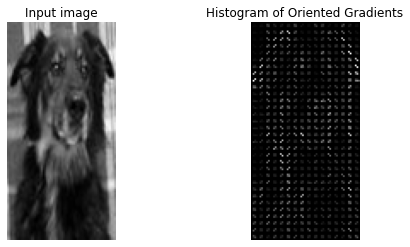

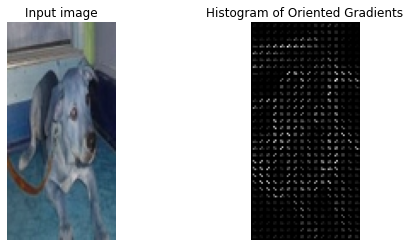

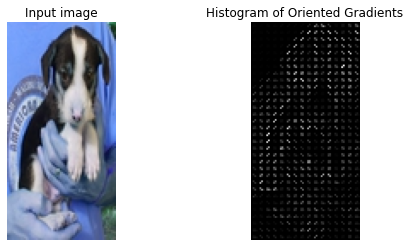

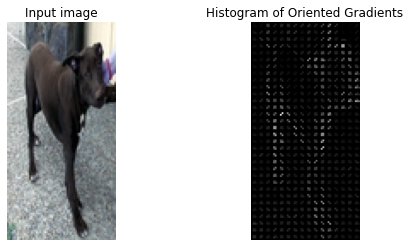

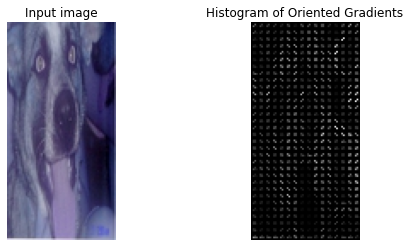

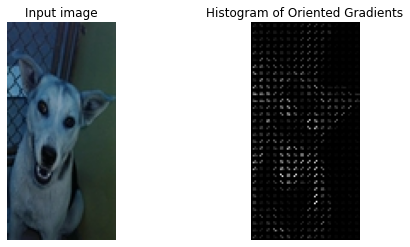

In [ ]:
all_images_dog = os.listdir(f"PetImages/Dog/")
plot = len(images)
# iterate over the image names, get the label
for image in all_images_dog:
    image_path = f"PetImages/Dog/{image}"
    #image_name.append(image_path)
    image = cv2.imread(image_path)
    
    if(len(images) < plot+10):
      # get the HOG descriptor for the image
      #hog_desc = hog.compute(image,winStride,padding,locations)
      _, hog_image  = feature.hog(image, orientations=9, 
                             pixels_per_cell=(4, 4),
                             cells_per_block=(2, 2), 
                             transform_sqrt=True, 
                             block_norm='L2-Hys', 
                             visualize = True)
      
      fig, (bx1, bx2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

      bx1.axis('off')
      bx1.imshow(image, cmap=plt.cm.gray)
      bx1.set_title('Input image')

      # Rescale histogram for better display
      hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

      bx2.axis('off')
      bx2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
      bx2.set_title('Histogram of Oriented Gradients')
      plt.show()

    hog_desc = hog2.compute(image,winStride)

    # update the data and labels
    images.append(hog_desc)
    labels.append("Dog")

In [ ]:
import random

random.Random(43).shuffle(images)
random.Random(43).shuffle(labels)
#random.Random(43).shuffle(image_name)

In [ ]:
images = np.asarray(images)
print(images.shape)

(24998, 3780, 1)


In [ ]:
nsamples, nx, ny = images.shape
d2_images = images.reshape((nsamples,nx*ny))

In [ ]:
d2_images.shape

(24998, 3780)

In [ ]:
from sklearn.svm import SVC

# train Linear SVC 
print('Training on train images...')
svm_model = SVC(#random_state=42, 
                kernel = 'poly',
                tol=1e-5,
                #max_iter = 20000,
                cache_size = 1500)
svm_model.fit(d2_images[:20000], labels[:20000])

Training on train images...


SVC(C=1.0, break_ties=False, cache_size=1500, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-05, verbose=False)

In [ ]:
from google.colab.patches import cv2_imshow
n = 20000
accuracy = 0
prediction=[]
for img in images[20000:]:
  # UNCOMMENT if we want to plot the images with the prediction in it
  #image = cv2.imread(image_name[n])
  #print(image_name[n])
  #print(n)
  #_, hog_image = feature.hog(image, orientations=9, pixels_per_cell=(8, 8),
  #      cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys', visualize=True)
  #hog_desc = hog2.compute(image,winStride,padding,locations)
  pred = svm_model.predict(img.reshape(1, -1))[0]
  # convert the HOG image to appropriate data type. We do...
  # ... this instead of rescaling the pixels from 0. to 255.
  #print(pred.title())
  #print(labels[n])

  #hog_image = hog_image.astype('float64')
  
  # show thw HOG image
  if(labels[n] == pred.title()):
    accuracy = accuracy + 1
  n = n + 1

  prediction.append(pred)

print('accuracy > %.3f%%' % (accuracy/len(labels[20000:]) * 100.0))



  #cv2.putText(image, pred.title(), (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)

  #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

  #ax1.axis('off')
  #ax1.imshow(image, cmap=plt.cm.gray)
  #ax1.set_title('Input image')

  # Rescale histogram for better display
  #hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

  #ax2.axis('off')
  #ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
  #ax2.set_title('Histogram of Oriented Gradients')
  #plt.show()

  #cv2_imshow(hog_image)
  
  #cv2_imshow(image)

accuracy > 77.231%


In [ ]:
gt = []
y_pred = []

for i in labels[20000:]:
  if(i == 'Cat'):
    gt.append(0)
  else:
    gt.append(1)

for j in prediction:
  if(j == 'Cat'):
    y_pred.append(0)
  else:
    y_pred.append(1)

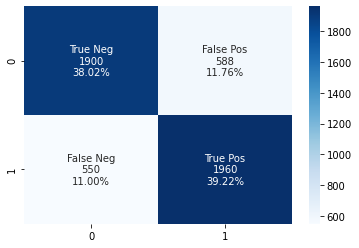

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(gt, y_pred)
import seaborn as sns
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labelsP = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labelsP = np.asarray(labelsP).reshape(2,2)
sns.heatmap(cf_matrix, annot=labelsP, fmt='', cmap='Blues')

In [ ]:
precision = cf_matrix.flatten()[3] / (cf_matrix.flatten()[3] + cf_matrix.flatten()[1])
recall = cf_matrix.flatten()[3] / (cf_matrix.flatten()[3] + cf_matrix.flatten()[2])
print('accuracy > %.2f' % precision)
print('recall > %.2f' % recall)

accuracy > 0.77
recall > 0.78
